## Person Instance Segmentation with Mask-RCNN

[Korean](01_garbage.ko-KR.ipynb) \| [English](01_garbage.en-US.ipynb) \| Copyright (c) 2023 [Jihoon Lucas Kim](https://github.com/kimnamu)

<a href="https://colab.research.google.com/github/kimnamu/cvnets/blob/master/demo/classfication/01_garbage.ko-KR.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"></a>

이 notebook은 Custom Dataset으로 Image Instance Segmentation 모델을 학습하는 과정을 다루고 있습니다.

reference
- [MMDetection](https://github.com/open-mmlab/mmdetection)
- https://github.com/open-mmlab/mmdetection/blob/master/demo/MMDet_InstanceSeg_Tutorial.ipynb
- https://github.com/open-mmlab/mmdetection/blob/master/demo/MMDet_Tutorial.ipynb

## Process - Inference

- COCO 데이터셋에서 사전 학습된 Mask R-CNN 모델을 로드하여 인퍼런스하는 주피터 노트북 예제를 작성하겠습니다.


- 0. 필요한 라이브러리 설치
- 1. 필요한 패키지 import
- 2. 사전 학습된 모델 다운로드
- 3. Config 파일 설정
- 4. Config 객체 생성
- 5. 모델 초기화 및 가중치 로드
- 6. 이미지 파일 준비
- 7. 인퍼런스 실행 및 결과 시각화

### 0. 필요한 라이브러리 설치

- MMDetection의 [Install Guide](https://github.com/open-mmlab/mmdetection/blob/master/docs/en/get_started.md/#Installation)를 따라 라이브러리를 설치합니다.
- mmcv version check : [here](https://download.openmmlab.com/mmcv/dist/index.html)
- pytorch version check : [here](https://pytorch.org/get-started/previous-versions/)

In [ ]:
# install pytorch
!pip install torch==1.7.0+cu110 torchvision==0.8.1+cu110 torchaudio===0.7.0 -f https://download.pytorch.org/whl/torch_stable.html

# Step 0. Install MMCV using MIM.
!pip install openmim
!mim install mmcv-full

# Step 1. Install MMDetection.
!git clone https://github.com/open-mmlab/mmdetection.git
!cd mmdetection
!pip install -v -e .

### 1. 필요한 패키지 import

In [ ]:
import mmcv
from mmcv import Config
from mmdet.apis import init_detector, inference_detector, show_result_pyplot

### 2. 사전 학습된 모델 다운로드

In [ ]:
!wget https://download.openmmlab.com/mmdetection/v2.0/mask_rcnn/mask_rcnn_r50_fpn_1x_coco/mask_rcnn_r50_fpn_1x_coco_20200205-d4b0c5d6.pth

--2023-04-02 19:33:28--  https://download.openmmlab.com/mmdetection/v2.0/mask_rcnn/mask_rcnn_r50_fpn_1x_coco/mask_rcnn_r50_fpn_1x_coco_20200205-d4b0c5d6.pth
Resolving download.openmmlab.com (download.openmmlab.com)... 163.181.22.207, 163.181.22.212, 163.181.22.211, ...
Connecting to download.openmmlab.com (download.openmmlab.com)|163.181.22.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 177862517 (170M) [application/octet-stream]
Saving to: ‘mask_rcnn_r50_fpn_1x_coco_20200205-d4b0c5d6.pth’

mask_rcnn_r50_fpn_1 100%[===================>] 169.62M  9.19MB/s    in 19s     

2023-04-02 19:33:51 (8.87 MB/s) - ‘mask_rcnn_r50_fpn_1x_coco_20200205-d4b0c5d6.pth’ saved [177862517/177862517]



### 3. Config 파일 설정

In [ ]:
import mmcv

# Choose to use a config and initialize the detector
config = 'configs/mask_rcnn/mask_rcnn_r50_fpn_1x_coco.py'
# Setup a checkpoint file to load
checkpoint = 'mask_rcnn_r50_fpn_1x_coco_20200205-d4b0c5d6.pth'

# Set the device to be used for evaluation
device='cuda:0'

# Load the config
config = mmcv.Config.fromfile(config)

# Set pretrained to be None since we do not need pretrained model here
config.model.pretrained = None

### 4. Config 객체 생성

In [ ]:
from mmcv.runner import load_checkpoint
from mmdet.models import build_detector

# Initialize the detector
model = build_detector(config.model)

# Load checkpoint
checkpoint = load_checkpoint(model, checkpoint, map_location=device)

# Set the classes of models for inference
model.CLASSES = checkpoint['meta']['CLASSES']

# We need to set the model's cfg for inference
model.cfg = config

# Convert the model to GPU
model.to(device)
# Convert the model into evaluation mode
model.eval()

load checkpoint from local path: mask_rcnn_r50_fpn_1x_coco_20200205-d4b0c5d6.pth


MaskRCNN(
  (backbone): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): ResLayer(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
          

### 5. 모델 초기화 및 가중치 로드

In [ ]:
from mmdet.apis import inference_detector
# Use the detector to do inference
img = 'demo/demo.jpg'
result = inference_detector(model, img)

/home/ohouse-recomm/lucas/models/mmdetection/mmdet/datasets/utils.py:70: UserWarning: "ImageToTensor" pipeline is replaced by "DefaultFormatBundle" for batch inference. It is recommended to manually replace it in the test data pipeline in your config file.
  'data pipeline in your config file.', UserWarning)


### 6. 인퍼런스 실행 및 결과 시각화
이제 주피터 노트북에서 실행하면, COCO 데이터셋에서 사전 학습된 Mask R-CNN 모델을 로드하여 이미지에 대한 인스턴스 세그멘테이션 결과를 얻을 수 있습니다. 결과는 주피터 노트북에서 시각화됩니다.

In [ ]:
from mmdet.apis import show_result_pyplot

show_result_pyplot(model, img, result)

## Process - Train
0. 필요한 라이브러리 설치
1. 학습데이터 살펴보기
2. 필요한 패키지 import 및 환경 설정
3. COCO 데이터셋 다운로드 및 경로 설정
4. Mask R-CNN용 Config 설정
5. Config 객체 생성 및 데이터셋 빌드
6. 모델 및 학습 설정
7. 학습된 모델로 인스턴스 세그멘테이션 예측하기
8. Mask RCNN 모델 살펴보기

### 0. 필요한 라이브러리 설치

```
# install pytorch
!pip install torch==1.7.0+cu110 torchvision==0.8.1+cu110 torchaudio===0.7.0 -f https://download.pytorch.org/whl/torch_stable.html

# Step 0. Install MMCV using MIM.
!pip install openmim
!mim install mmcv-full

# Step 1. Install MMDetection.
!git clone https://github.com/open-mmlab/mmdetection.git
!cd mmdetection
!pip install -v -e .
```

### 1. 학습데이터 살펴보기

- 먼저 필요한 라이브러리를 설치하고 불러오겠습니다.
    ```
    !pip install pycocotools
    ```

In [1]:
import os
import json
import random
from pathlib import Path
from PIL import Image
from pycocotools.coco import COCO
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# 다음으로, COCO 데이터셋에 대한 경로와 사용할 이미지 개수를 설정합니다.
data_root = Path("dataset/")
val_ann_path = data_root / "annotations/instances_val2017_filtered_dog_cat.json"
val_img_dir = data_root / "val2017"

num_images_to_display = 5  # 시각화할 이미지의 수를 설정합니다.

# COCO 데이터셋을 로드하고 이미지 목록을 가져옵니다.
coco = COCO(str(val_ann_path))
image_ids = coco.getImgIds()

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!


coco dataset 80개 class에서 특정 class 정보만 parsing 하는법
- https://github.com/kimnamu/annotation/blob/main/coco/create_subclass.ipynb

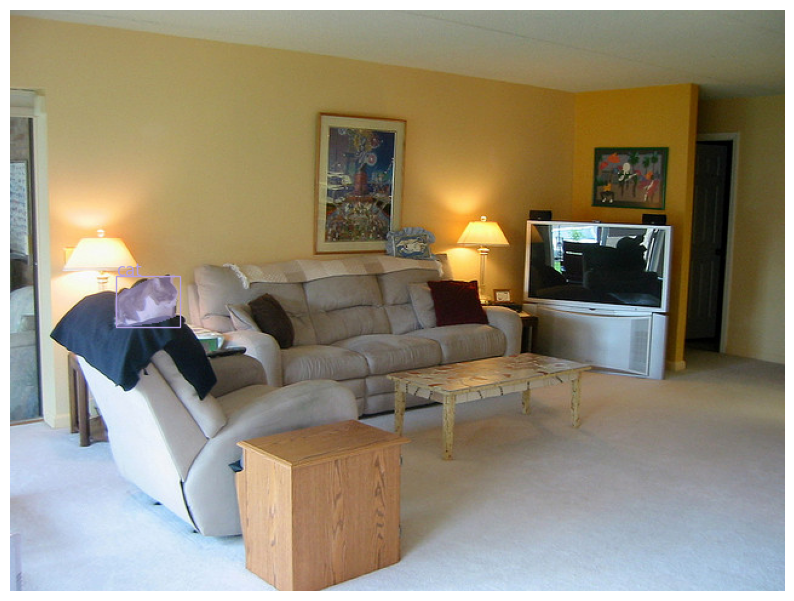

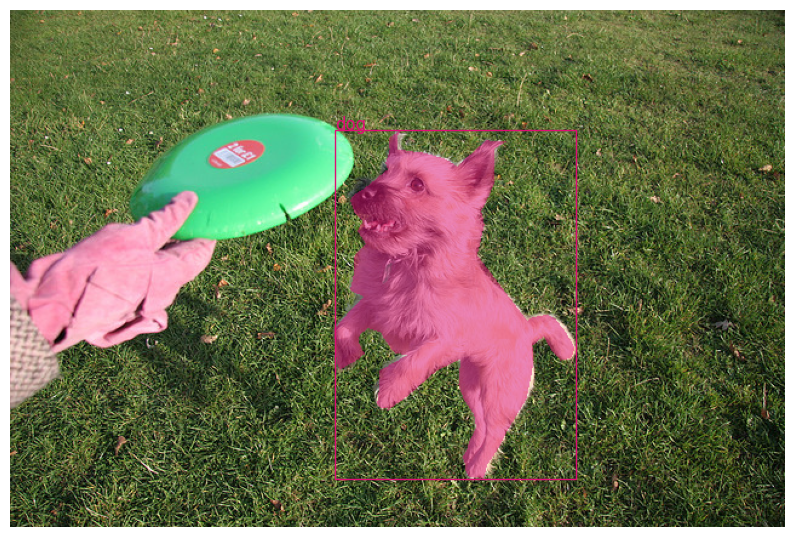

In [2]:
# 이 코드를 실행하면 annotations/instances_val2017.json 파일의 좌표 정보를 사용하여 COCO 데이터셋에서 무작위로 선택된 이미지들에 대해 인스턴스 세그멘테이션 결과를 시각화합니다.
# 시각화된 이미지에는 각 객체에 대한 바운딩 박스와 클래스 이름이 표시되며, 객체의 영역은 반투명한 색상으로 표현됩니다.
def apply_mask(image, mask, color, alpha=0.5):
    """이미지에 마스크를 적용합니다."""
    for c in range(3):
        image[:, :, c] = np.where(
            mask == 1,
            image[:, :, c] * (1 - alpha) + alpha * color[c] * 255,
            image[:, :, c]
        )
    return image

def random_color():
    """무작위로 색상을 생성합니다."""
    # return tuple(np.random.randint(0, 256, size=3))
    return tuple(np.random.random(size=3))

def draw_bbox(ax, bbox, color, class_name):
    """이미지에 바운딩 박스와 클래스 이름을 그립니다."""
    x, y, width, height = bbox
    rect = patches.Rectangle((x, y), width, height, linewidth=1, edgecolor=color, facecolor='none')
    ax.add_patch(rect)
    ax.text(x, y, class_name, color=color, fontsize=12, bbox=dict(facecolor='none', edgecolor='none', alpha=0.5, pad=0))


data_root = Path("dataset/")
val_ann_path = data_root / "annotations/instances_val2017_filtered_person.json"
val_img_dir = data_root / "val2017"

selected_image_ids = random.sample(image_ids, num_images_to_display)

for image_id in selected_image_ids:
    image_data = coco.loadImgs(image_id)[0]
    image_path = val_img_dir / image_data['file_name']
    image = Image.open(image_path)
    image = np.array(image)
    
    ann_ids = coco.getAnnIds(imgIds=image_data['id'])
    annotations = coco.loadAnns(ann_ids)

    fig, ax = plt.subplots(figsize=(10, 10))
    
    for ann in annotations:
        if 'segmentation' not in ann:
            continue

        category_id = ann['category_id']
        cat = coco.loadCats(category_id)[0]['name']
        
        # Segmentation 마스크를 얻습니다.
        mask = coco.annToMask(ann)
        
        # 무작위 색상을 선택하고 마스크를 이미지에 적용합니다.
        color = random_color()
        image = apply_mask(image, mask, color)

        # 바운딩 박스와 클래스 이름을 그립니다.
        draw_bbox(ax, ann['bbox'], color, cat)

    # 마스크와 바운딩 박스가 적용된 이미지를 시각화합니다.
    ax.imshow(image)
    ax.axis("off")
    plt.show()


### 2. 필요한 패키지 import 및 환경 설정

In [3]:
import os
import sys
from mmcv import Config
from mmdet.datasets import build_dataset
from mmdet.models import build_detector
from mmdet.apis import train_detector, init_detector, inference_detector, show_result_pyplot
from mmdet.datasets import CocoDataset

/home/ohouse-recomm/miniconda3/envs/torch17/lib/python3.7/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/ohouse-recomm/miniconda3/envs/torch17/lib/python3.7/site-packages/mmcv/__init__.py:21: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  'On January 1, 2023, MMCV will release v2.0.0, in which it will remove '


### 3. COCO 데이터셋 다운로드 및 경로 설정
데이터셋을 다운로드 받아 알맞은 경로에 저장하세요.

In [ ]:
!wget http://images.cocodataset.org/zips/train2017.zip
!wget http://images.cocodataset.org/zips/val2017.zip
!wget http://images.cocodataset.org/annotations/annotations_trainval2017.zip

!unzip -q train2017.zip -d data/coco/
!unzip -q val2017.zip -d data/coco/
!unzip -q annotations_trainval2017.zip -d data/coco/annotations/

### 4. Mask R-CNN용 Config 설정

In [4]:
config_dataset = """
# dataset settings
dataset_type = 'CocoDataset'
data_root = 'dataset/'
img_norm_cfg = dict(
    mean=[123.675, 116.28, 103.53], std=[58.395, 57.12, 57.375], to_rgb=True)
train_pipeline = [
    dict(type='LoadImageFromFile'),
    dict(type='LoadAnnotations', with_bbox=True, with_mask=True),
    dict(type='Resize', img_scale=(1333, 800), keep_ratio=True),
    dict(type='RandomFlip', flip_ratio=0.5),
    dict(type='Normalize', **img_norm_cfg),
    dict(type='Pad', size_divisor=32),
    dict(type='DefaultFormatBundle'),
    dict(type='Collect', keys=['img', 'gt_bboxes', 'gt_labels', 'gt_masks']),
]
test_pipeline = [
    dict(type='LoadImageFromFile'),
    dict(
        type='MultiScaleFlipAug',
        img_scale=(1333, 800),
        flip=False,
        transforms=[
            dict(type='Resize', keep_ratio=True),
            dict(type='RandomFlip'),
            dict(type='Normalize', **img_norm_cfg),
            dict(type='Pad', size_divisor=32),
            dict(type='ImageToTensor', keys=['img']),
            dict(type='Collect', keys=['img']),
        ])
]

custom_classes = ('dog', 'cat')                                                         # 여기에 사용자 지정 클래스를 입력하세요.

data = dict(
    samples_per_gpu=2,
    workers_per_gpu=2,
    train=dict(
        type=dataset_type,
        ann_file=data_root + 'annotations/instances_val2017_filtered_dog_cat.json',     # annotations/instances_train2017.json
        img_prefix=data_root + 'val2017/',                                              # 'train2017/'
        pipeline=train_pipeline,
        classes=custom_classes),                                                        # 데이터셋 설정에 사용자 지정 클래스를 추가합니다.
    val=dict(
        type=dataset_type,
        ann_file=data_root + 'annotations/instances_val2017_filtered_dog_cat.json',
        img_prefix=data_root + 'val2017/',
        pipeline=test_pipeline,
        classes=custom_classes),                                                        # 데이터셋 설정에 사용자 지정 클래스를 추가합니다.
    test=dict(
        type=dataset_type,
        ann_file=data_root + 'annotations/instances_val2017_filtered_dog_cat.json',
        img_prefix=data_root + 'val2017/',
        pipeline=test_pipeline,
        classes=custom_classes))                                                        # 데이터셋 설정에 사용자 지정 클래스를 추가합니다.
evaluation = dict(metric=['bbox', 'segm'])
"""

with open("configs/_base_/datasets/coco_sample.py", 'w') as f:
    f.write(config_dataset)


config_schedule='''
# optimizer
optimizer = dict(type='SGD', lr=0.002, momentum=0.9, weight_decay=0.0001)
optimizer_config = dict(grad_clip=None)
# learning policy
lr_config = dict(
    policy='step',
    warmup='linear',
    warmup_iters=500,
    warmup_ratio=0.001,
    step=[8, 11])
runner = dict(type='EpochBasedRunner', max_epochs=20)                                   # 학습 epoch 결정
'''

with open('configs/_base_/schedules/schedule_1x_sample.py', 'w') as f:
    f.write(config_schedule)

config_model='''
_base_ = [
    # '../_base_/models/mask_rcnn_r50_fpn.py',
    '../_base_/datasets/coco_sample.py',
    '../_base_/schedules/schedule_1x_sample.py',
    '../_base_/default_runtime.py'
]

# model settings
model = dict(
    type='MaskRCNN',
    backbone=dict(
        type='ResNet',
        depth=50,
        num_stages=4,
        out_indices=(0, 1, 2, 3),
        frozen_stages=1,
        norm_cfg=dict(type='BN', requires_grad=True),
        norm_eval=True,
        style='pytorch',
        init_cfg=dict(type='Pretrained', checkpoint='torchvision://resnet50')),
    neck=dict(
        type='FPN',
        in_channels=[256, 512, 1024, 2048],
        out_channels=256,
        num_outs=5),
    rpn_head=dict(
        type='RPNHead',
        in_channels=256,
        feat_channels=256,
        anchor_generator=dict(
            type='AnchorGenerator',
            scales=[8],
            ratios=[0.5, 1.0, 2.0],
            strides=[4, 8, 16, 32, 64]),
        bbox_coder=dict(
            type='DeltaXYWHBBoxCoder',
            target_means=[.0, .0, .0, .0],
            target_stds=[1.0, 1.0, 1.0, 1.0]),
        loss_cls=dict(
            type='CrossEntropyLoss', use_sigmoid=True, loss_weight=1.0),
        loss_bbox=dict(type='L1Loss', loss_weight=1.0)),
    roi_head=dict(
        type='StandardRoIHead',
        bbox_roi_extractor=dict(
            type='SingleRoIExtractor',
            roi_layer=dict(type='RoIAlign', output_size=7, sampling_ratio=0),
            out_channels=256,
            featmap_strides=[4, 8, 16, 32]),
        bbox_head=dict(
            type='Shared2FCBBoxHead',
            in_channels=256,
            fc_out_channels=1024,
            roi_feat_size=7,
            num_classes=2,                                                          # Set the number of classes
            bbox_coder=dict(
                type='DeltaXYWHBBoxCoder',
                target_means=[0., 0., 0., 0.],
                target_stds=[0.1, 0.1, 0.2, 0.2]),
            reg_class_agnostic=False,
            loss_cls=dict(
                type='CrossEntropyLoss', use_sigmoid=False, loss_weight=1.0),
            loss_bbox=dict(type='L1Loss', loss_weight=1.0)),
        mask_roi_extractor=dict(
            type='SingleRoIExtractor',
            roi_layer=dict(type='RoIAlign', output_size=14, sampling_ratio=0),
            out_channels=256,
            featmap_strides=[4, 8, 16, 32]),
        mask_head=dict(
            type='FCNMaskHead',
            num_convs=4,
            in_channels=256,
            conv_out_channels=256,
            num_classes=2,                                                          # Set the number of classes
            loss_mask=dict(
                type='CrossEntropyLoss', use_mask=True, loss_weight=1.0))),
    # model training and testing settings
    train_cfg=dict(
        rpn=dict(
            assigner=dict(
                type='MaxIoUAssigner',
                pos_iou_thr=0.7,
                neg_iou_thr=0.3,
                min_pos_iou=0.3,
                match_low_quality=True,
                ignore_iof_thr=-1),
            sampler=dict(
                type='RandomSampler',
                num=256,
                pos_fraction=0.5,
                neg_pos_ub=-1,
                add_gt_as_proposals=False),
            allowed_border=-1,
            pos_weight=-1,
            debug=False),
        rpn_proposal=dict(
            nms_pre=2000,
            max_per_img=1000,
            nms=dict(type='nms', iou_threshold=0.7),
            min_bbox_size=0),
        rcnn=dict(
            assigner=dict(
                type='MaxIoUAssigner',
                pos_iou_thr=0.5,
                neg_iou_thr=0.5,
                min_pos_iou=0.5,
                match_low_quality=True,
                ignore_iof_thr=-1),
            sampler=dict(
                type='RandomSampler',
                num=512,
                pos_fraction=0.25,
                neg_pos_ub=-1,
                add_gt_as_proposals=True),
            mask_size=28,
            pos_weight=-1,
            debug=False)),
    test_cfg=dict(
        rpn=dict(
            nms_pre=1000,
            max_per_img=1000,
            nms=dict(type='nms', iou_threshold=0.7),
            min_bbox_size=0),
        rcnn=dict(
            score_thr=0.05,
            nms=dict(type='nms', iou_threshold=0.5),
            max_per_img=100,
            mask_thr_binary=0.5)))
'''

with open('configs/mask_rcnn/mask_rcnn_r50_fpn_1x_coco_sample.py', 'w') as f:
    f.write(config_model)

### 5. Config 객체 생성 및 데이터셋 빌드

In [5]:
import os
config = './configs/mask_rcnn/mask_rcnn_r50_fpn_1x_coco_sample.py'
cfg = Config.fromfile(config)

print(cfg.data.train)
datasets = [build_dataset(cfg.data.train)]

{'type': 'CocoDataset', 'ann_file': 'dataset/annotations/instances_val2017_filtered_dog_cat.json', 'img_prefix': 'dataset/val2017/', 'pipeline': [{'type': 'LoadImageFromFile'}, {'type': 'LoadAnnotations', 'with_bbox': True, 'with_mask': True}, {'type': 'Resize', 'img_scale': (1333, 800), 'keep_ratio': True}, {'type': 'RandomFlip', 'flip_ratio': 0.5}, {'type': 'Normalize', 'mean': [123.675, 116.28, 103.53], 'std': [58.395, 57.12, 57.375], 'to_rgb': True}, {'type': 'Pad', 'size_divisor': 32}, {'type': 'DefaultFormatBundle'}, {'type': 'Collect', 'keys': ['img', 'gt_bboxes', 'gt_labels', 'gt_masks']}], 'classes': ('dog', 'cat')}
loading annotations into memory...
Done (t=0.01s)
creating index...
index created!


### 6. 모델 및 학습 설정

In [7]:
from mmdet.apis import set_random_seed

model = build_detector(cfg.model, train_cfg=cfg.get('train_cfg'), test_cfg=cfg.get('test_cfg'))
model.init_weights()

# Set seed thus the results are more reproducible
cfg.seed = 0
set_random_seed(0, deterministic=False)
cfg.device = 'cuda'
cfg.gpu_ids = range(1)
cfg.work_dir = './mask_rcnn_instance_segmentation_dog_cat'

train_detector(model, datasets, cfg, distributed=False, validate=True)


2023-04-08 16:55:06,898 - mmcv - INFO - initialize ResNet with init_cfg {'type': 'Pretrained', 'checkpoint': 'torchvision://resnet50'}
2023-04-08 16:55:06,899 - mmcv - INFO - load model from: torchvision://resnet50
2023-04-08 16:55:06,899 - mmcv - INFO - load checkpoint from torchvision path: torchvision://resnet50
2023-04-08 16:55:07,056 - mmcv - WARNING - The model and loaded state dict do not match exactly

unexpected key in source state_dict: fc.weight, fc.bias

2023-04-08 16:55:07,089 - mmcv - INFO - initialize FPN with init_cfg {'type': 'Xavier', 'layer': 'Conv2d', 'distribution': 'uniform'}
2023-04-08 16:55:07,108 - mmcv - INFO - initialize RPNHead with init_cfg {'type': 'Normal', 'layer': 'Conv2d', 'std': 0.01}
2023-04-08 16:55:07,115 - mmcv - INFO - initialize Shared2FCBBoxHead with init_cfg [{'type': 'Normal', 'std': 0.01, 'override': {'name': 'fc_cls'}}, {'type': 'Normal', 'std': 0.001, 'override': {'name': 'fc_reg'}}, {'type': 'Xavier', 'distribution': 'uniform', 'override'

이제 모델 학습이 시작됩니다. 학습 과정을 진행하며 생성되는 가중치 파일은 mask_rcnn_instance_segmentation/ 디렉토리에 저장됩니다.

### 7. 학습된 모델로 인스턴스 세그멘테이션 예측하기
학습이 완료되면, 학습된 모델의 가중치를 사용하여 인스턴스 세그멘테이션 결과를 얻을 수 있습니다.

load checkpoint from local path: mask_rcnn_instance_segmentation_dog_cat/epoch_20.pth


/home/ohouse-recomm/lucas/models/mmdetection/mmdet/datasets/utils.py:70: UserWarning: "ImageToTensor" pipeline is replaced by "DefaultFormatBundle" for batch inference. It is recommended to manually replace it in the test data pipeline in your config file.
  'data pipeline in your config file.', UserWarning)


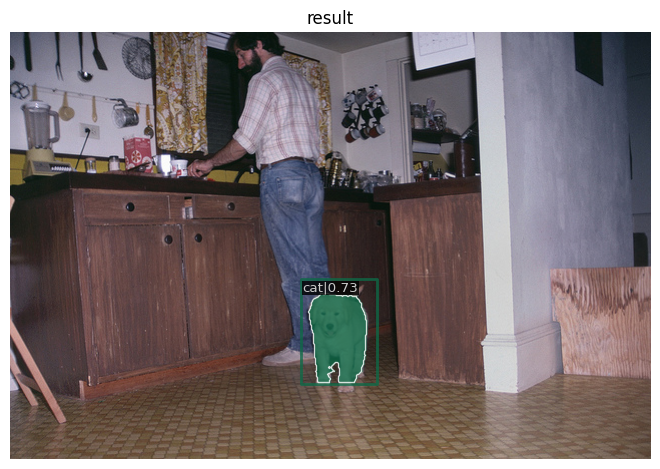

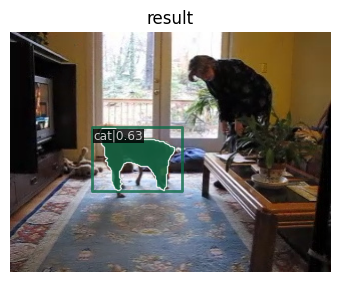

In [8]:
import os
import mmcv
from mmcv import Config
from mmdet.apis import init_detector, inference_detector, show_result_pyplot
from mmcv.runner import load_checkpoint

config = './configs/mask_rcnn/mask_rcnn_r50_fpn_1x_coco_sample.py'
cfg = Config.fromfile(config)

cfg.model.pretrained = None
checkpoint = 'mask_rcnn_instance_segmentation_dog_cat/epoch_20.pth'

model = init_detector(cfg, device='cuda:0')
checkpoint = load_checkpoint(model, checkpoint, map_location='cuda:0')

model.CLASSES = ["dog", "cat"]
# print(checkpoint['meta']['CLASSES'])

for filename in ['000000329219.jpg', '000000404484.jpg', '000000205834.jpg']:
    img = f'dataset/val2017/{filename}'
    result = inference_detector(model, img)
    show_result_pyplot(model, img, result, score_thr=0.6)

### 8. Mask R-CNN 살펴보기

#### - Mask R-CNN이란?

- Background
  <center><img src = "https://drive.google.com/uc?id=1HxXzdxkl0-bOOm71rrBgbntDpzRi3mhU"  height = 300> </center>
  
  - classification : 이미지의 클래스를 판별합니다.
  - localization : 객체의 위치정보를 추정합니다.
  - Object Detection : 위치와 클래스 정보를 모두 반환합니다.
  - Semantic Segmentation : 바운딩 박스 대신, 객체 주변에 경계를 그리고 픽셀 수준의 객체정보를 반환합니다.
  - Instance Segmentation : Semantic Segmentation과 비교를 한다면 동일한 클래스에 대해서도 서로 다른 instance로 인식합니다.
  <center><img src = "https://drive.google.com/uc?id=1BDui-FKK9gt-RDTe-ZWd7ZPg8_21zPLW"  height = 300> </center>
  - Faster R-CNN
      - Image Segmentation은 경계 상자를 만드는 대신 동일한 객체에 속하는 픽셀을 그룹화합니다. 대부분 Faster R-CNN을 기반으로 높은 정확도의 이미지 분할을 쉽게 구현할 수 있습니다.
      <center><img src = "https://drive.google.com/uc?id=17BWCmM41hdBsl4hkfpd5PrhItd_MYUFD"  height = 300> </center>

      - Faster R-CNN은 CNN Feature Extraction 사용하여 이미지 특징을 추출합니다. 그런 다음 CNN 영역 제안 네트워크를 사용하여 관심 영역(RoI)을 생성합니다. RoI 풀링을 적용하여 고정된 차원으로 warping합니다. 그런 다음 완전히 연결된 레이어에 공급하여 Classification 및 Boundary Box 예측을 수행합니다.

- Mask R-CNN
    - Faster R-CNN은 특징 추출과 ROI 제안을 위한 모든 기초 작업을 구축합니다. 처음에는 이미지 세그먼테이션을 수행하려면 이미지 세그먼트에 색상을 지정하기 위해 더 많은 세부 분석이 필요할 수 있습니다. 놀랍게도 이 모델에 편승할 수 있을 뿐만 아니라 필요한 추가 작업은 매우 간단합니다. ROI 풀링 후에 컨볼루션 레이어를 2개 더 추가하여 Mask를 구축하면 됩니다.

    - Mask R-CNN 백서에서는 이러한 Mask를 만들 때 한 가지 변형(오른쪽)을 더 제공합니다. 하지만 아이디어는 매우 간단합니다.
    <center><img src = "https://drive.google.com/uc?id=1LTbcm40Jnxas1q8Kw-_CWggidjpzv8ho"  height = 300> </center>
    - Backbone은 FPN 스타일의 심층 신경망입니다. 상향식 경로, 하향식 경로, 측면 연결로 구성됩니다. 상향식 경로는 원시 이미지에서 특징을 추출하는 모든 ConvNet(일반적으로 ResNet 또는 VGG)이 될 수 있습니다. 하향식 경로는 상향식 경로와 비슷한 크기의 특징 피라미드 맵을 생성합니다. 측면 연결은 두 경로의 두 해당 레벨 사이에 컨볼루션 및 추가 연산을 수행합니다. FPN은 다양한 해상도 스케일에서 의미적으로 강력한 특징을 유지한다는 점에서 다른 단일 컨볼루션 네트워크보다 성능이 뛰어납니다.
    - <center><img src = "https://drive.google.com/uc?id=1U-WPZHNu83ze7gBhgd_DbeuqqiMfBkus"  height = 300> </center>

- RPN
    - 이제 첫 번째 단계를 살펴보겠습니다. RPN이라는 경량 신경망은 모든 FPN 상하 경로(이하 특징 맵이라고 함)를 스캔하여 객체가 포함될 수 있는 영역을 제안합니다. 피처 맵을 스캔하는 것은 효율적인 방법이지만, 피처를 원시 이미지 위치에 바인딩하는 방법이 필요합니다. 여기 앵커가 있습니다. 앵커는 이미지에 대해 미리 정의된 위치와 배율을 가진 상자 집합입니다. 실측 기준 클래스(이 단계에서는 객체 또는 배경 바이너리로만 분류됨)와 경계 상자는 일부 IoU 값에 따라 개별 앵커에 할당됩니다. 서로 다른 스케일을 가진 앵커가 서로 다른 수준의 피처 맵에 바인딩되므로 RPN은 이러한 앵커를 사용하여 피처 맵에서 객체를 '가져와야 하는' 위치와 해당 바운딩 박스의 크기를 파악합니다. 컨볼루션, 다운샘플링, 업샘플링을 사용하면 피처가 원본 이미지의 객체와 동일한 상대적 위치를 유지하며 엉망이 되지 않을 것이라는 데 동의할 수 있습니다.
    
- ROI Align
    - 두 번째 단계에서는 다른 신경망이 첫 번째 단계에서 제안된 영역을 가져와 특징 맵 수준의 여러 특정 영역에 할당하고 이러한 영역을 스캔하여 객체 클래스(다중 범주 분류), 경계 상자 및 Mask를 생성합니다. 절차는 RPN과 비슷해 보입니다. 차이점은 2단계에서는 앵커의 도움 없이 ROIAlign이라는 트릭을 사용하여 피처 맵의 관련 영역을 찾고, 각 오브젝트에 대한 Mask를 픽셀 단위로 생성하는 분기가 있다는 점입니다.

    - Mask R-CNN의 또 다른 주요 기여는 ROI 풀링의 개선입니다. ROI에서는 Warping이 디지털화되어(아래 왼쪽 상단 다이어그램) 대상 특징 맵의 셀 경계가 입력 특징 맵의 경계에 맞춰 강제로 재조정됩니다. 따라서 각 대상 셀의 크기가 같지 않을 수 있습니다(왼쪽 아래 다이어그램). Mask R-CNN은 셀의 경계를 디지털화하지 않고(오른쪽 상단), 모든 대상 셀의 크기를 동일하게 만드는(오른쪽 하단) ROI Align을 사용합니다. 또한 보간을 적용하여 셀 내의 특징 맵 값을 더 잘 계산합니다. 예를 들어, 보간을 적용하면 왼쪽 상단의 최대 특징값이 0.8에서 0.88로 변경됩니다.
    <center><img src = "https://drive.google.com/uc?id=1Oxld5hHw06UQ_sC4B3mxqByJUASTAD2Y"  height = 300> </center>
    
    - ROI 얼라인은 정확도를 크게 개선합니다.

    <center><img src = "https://drive.google.com/uc?id=17ZxZOCAfxiK9SsBizvHoRfqg6Ei7TpaS"  height = 150> </center>

    - RoIPooling
        - RoIPool은 각 RoI에서 small feature map을 추출하기 위한 표준 연산
        - RoIPool : 다른 사이즈의 Region Proposal이 들어와도, max pooling을 이용하여 output size를 동일하게 만듦 (Faster R-CNN에서 나오는 개념)
        - RoIPool은 RoI를 feature map으로 quantization하게 되는 데, 이 과정에서 RoI와 추출된 feature 사이에 오정렬을 초래하며 픽셀 단위로 예측하는 mask에 큰 악영향을 끼침
        - 이 단점을 해결하기 위해 추출한 feature를 input에 적절하게 정렬하는 RoIAlign layer를 제안했다.
        
    <center><img src = "https://drive.google.com/uc?id=17BWCmM41hdBsl4hkfpd5PrhItd_MYUFD"  height = 300> </center>

    - RoIAlign
        RoI에서 얻어내고자 하는 정보는 박스 안의 점이다. 위 사진에서 박스 한 칸이 1 픽셀을 의미한다면 점의 좌표는 정수가 아닌 실수가 된다. 그러나 이미지 데이터는 정수 좌표값만 가지고 있으므로 bilinear interpolation의 방법(화살표)으로 점의 값을 구하게 된다. (bilinear interpolation : 참고) 이 역할을 하는 것이 mask branch다. mask branch는 classification, bounding box regression branch와 독립적이며 small FCN(Fully Convolution Network)이다. 구현하기 쉽고 small하기 때문에 연산도 빠르다고 한다. 그리고 mask prediction과 class prediction을 분리했는데, 이로 인해서 mask prediction을 할 때 다른 클래스를 고려할 필요 없이 binary mask를 예측하면 되므로 성능이 향상되었다고 한다.

    - Network Architecture
        - BackBone
            이미지의 feature를 추출하기 위해 사용
            ResNet과 ResNeXt의 50, 101 layer과 FPN(Feature Pyramid Network)을 backbone으로 사용
        - Head
            - Bounding Box Recognition (Classification and Regression)과 Mask Prediction을 위해 사용됨
            - Faster R-CNN의 Head(Classification and Regression)에 Mask branch를 추가
            - backbone(ResNet, FPN)에 따라 Head의 구조가 달라짐

    <center><img src = "https://drive.google.com/uc?id=1PUFxm_OaTgqjpQpks2K-6zF3evJP8bVD"  height = 300> </center>

- Reference: https://jonathan-hui.medium.com/image-segmentation-with-mask-r-cnn-ebe6d793272, https://medium.com/analytics-vidhya/computer-vision-tutorial-implementing-mask-r-cnn-for-image-segmentation-with-python-code-fe34da5b99cd, https://velog.io/@sksmslhy/Paper-Review-Mask-R-CNN